# Yahoo Finance - Cryptocurrency heatmap & correlation graph
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/YahooFinance/YahooFinance_Display_chart_from_ticker.ipynb" target="_parent"><img src="https://naasai-public.s3.eu-west-3.amazonaws.com/open_in_naas.svg"/></a>

**Tags:** #cryptocurrency #eth #btc #heatmap #finance #trading

Get live data from the web and compute data viz and analysis about different cryptocurrencies.<br> 

**Author:** [Carlo Occhiena](https://www.linkedin.com/in/carloocchiena/)

## Input

### Install and import libraries

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns
try:
    import yfinance as yfin
except:
    !pip install yfinance
    import yfinance as yfin

### Setup your variables

In [2]:
# user settings (modify accordingly to Yahoo Finance parameters)
currency = "USD"
metric = "Close"

# Date
start = dt.datetime(2018,1,1)
end = dt.datetime.now()

👉 Insert a range of cryptocurrencies; here you'll have correlation and heatmap

In [3]:
# pick your favorite list of cryptocurrencies
crypto = ['BTC', 'ETH', 'LTC', 'XRP', 'DASH', 'SC']

## Model

### Get combined data

In [4]:
yfin.pdr_override()

colnames = []

first = True

for ticker in crypto:
    data = yfin.download(f"{ticker}-{currency}", start, end)
    if first:
        combined = data[[metric]].copy()
        colnames.append(ticker)
        combined.columns = colnames
        first = False
    else:
        combined = combined.join(data[metric])
        colnames.append(ticker)
        combined.columns = colnames
        
combined

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BTC,ETH,LTC,XRP,DASH,SC
Date,,,,,,
2017-12-31,14156.400391,756.732971,232.095993,2.300570,1051.680054,0.030350
2018-01-01,13657.200195,772.640991,229.033005,2.391030,1053.979980,0.030770
2018-01-02,14982.099609,884.443970,255.684006,2.480900,1217.719971,0.030722
2018-01-03,15201.000000,962.719971,245.367996,3.105370,1170.739990,0.032952
2018-01-04,15599.200195,980.921997,241.369995,3.196630,1229.790039,0.039108
...,...,...,...,...,...,...
2022-02-11,42407.937500,2927.383545,126.031158,0.760226,104.099358,0.010559
2022-02-12,42244.468750,2917.362793,126.683678,0.822408,103.887085,0.010685
2022-02-13,42197.515625,2883.463379,126.204216,0.810273,102.792747,0.010403


## Output

### Show heatmap and correlation

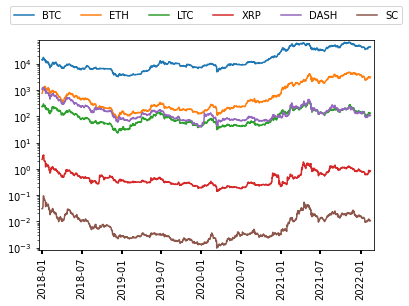

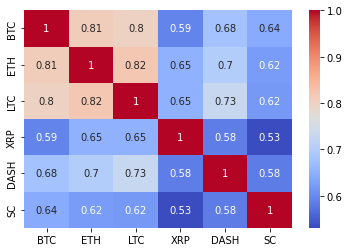

           BTC       ETH       LTC       XRP      DASH        SC
BTC   1.000000  0.806339  0.797003  0.593065  0.678787  0.642281
ETH   0.806339  1.000000  0.820027  0.652047  0.699974  0.620826
LTC   0.797003  0.820027  1.000000  0.651777  0.730300  0.617290
XRP   0.593065  0.652047  0.651777  1.000000  0.584203  0.530789
DASH  0.678787  0.699974  0.730300  0.584203  1.000000  0.583114
SC    0.642281  0.620826  0.617290  0.530789  0.583114  1.000000


In [5]:
plt.yscale('log') # first show linear
for ticker in crypto:
    plt.plot(combined[ticker], label=ticker)
    
plt.tick_params(axis="x", width = 2)
plt.xticks(rotation = "vertical", )
plt.margins(0.01)
plt.subplots_adjust(bottom = 0.15)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=6, fancybox=True, shadow=False)
plt.show()

# Correlation Heat Map
combined = combined.pct_change().corr(method='pearson')

sns.heatmap(combined, annot=True, cmap="coolwarm")
plt.show()
print(combined)